## Observations and Insights 

•	Based on the analysis, Capomulin appears to be the most effective regiment. Out of 25 mice, 84% of them survived by the end of the 45 days.

•	Ramicane also seems to be an effective drug, the survival rate was 80%, and the median tumor volume at the end of the experiment was 36.56 (mm3), compared to  Capomulin’s median tumor volume of 38.13 (mm3).

•	There was a good distribution of gender in the sample population (Female:49.4% vs Male:50.6%), and there seems to be a correlation between weight and tumor volume in the sample data (correlation factor:0.84).



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
# Data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data_df = pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID")

merged_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Check the number of mice in the DataFrame.
mice_count=len(merged_data_df["Mouse ID"].unique())

#Set total mice data frame
total_mice_df=pd.DataFrame({"Total Mice": mice_count}, index=[0])

total_mice_df

,Total Mice
0,249


In [9]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_timepoint=merged_data_df[merged_data_df.duplicated(["Mouse ID", "Timepoint"])]

duplicate_mice_timepoint[["Mouse ID", "Timepoint"]]

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [10]:
# Get all the data for the duplicate mouse ID. 
duplicate_mice_data=merged_data_df[merged_data_df.duplicated()]

duplicate_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#Drop duplicate mice
unique_mouseid_df=merged_data_df['Mouse ID'] != "g989"
unique_mouseid_df

0       True
1       True
2       True
3       True
4       True
        ... 
1888    True
1889    True
1890    True
1891    True
1892    True
Name: Mouse ID, Length: 1893, dtype: bool

In [16]:
#Check the number of mice in the clean DataFrame.
total_mice=unique_mouseid_df.count()

total_mice_df=pd.DataFrame({"Total Mice": total_mice}, index=[0])

total_mice_df

,Total Mice
0,1893


## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Calculate the mena, median, variance, standard deviation, and SEM
average_tumor_vol=merged_data_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
variance_tumor_vol=merged_data_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
std_tumor_vol=merged_data_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sem_tumor_vol=merged_data_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

#Create DataFrame for calculations
tumor_summary_df=pd.DataFrame({"Average Tumor Volume": average_tumor_vol,
                            "Variance of Tumor Volume": variance_tumor_vol, 
                            "Std Dev of Tumor Volume": std_tumor_vol, "Sem of Tumor Volume": sem_tumor_vol})

tumor_summary_df

,Average Tumor Volume,Variance of Tumor Volume,Std Dev of Tumor Volume,Sem of Tumor Volume
Drug Regimen,,,,
Capomulin,40.675741,24.947764,4.994774,0.329346
Ceftamin,52.591172,39.290177,6.268188,0.469821
Infubinol,52.884795,43.128684,6.567243,0.492236
Ketapril,55.235638,68.553577,8.279709,0.603860
Naftisol,54.331565,66.173479,8.134708,0.596466
Placebo,54.033581,61.168083,7.821003,0.581331
Propriva,52.322552,42.351070,6.507770,0.512884
Ramicane,40.216745,23.486704,4.846308,0.320955
Stelasyn,54.233149,59.450562,7.710419,0.573111


## Bar Plots

In [18]:
import numpy as np

In [19]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

#Group mice count per regimen
regimen_group = merged_data_df.groupby("Drug Regimen")

# Create a dataframe counting the number of data points for each Drug Regimen
regimen_count_df = pd.DataFrame(regimen_group["Drug Regimen"].count())

regimen_count_df


,Drug Regimen
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


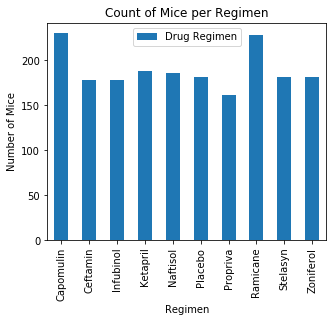

In [20]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

#Create bar plot
mice_bar_chart=regimen_count_df.plot(kind="bar",title="Count of Mice per Regimen", figsize=(5,4))

# Add the descriptive title, x labels and y labels
mice_bar_chart.set_xlabel("Regimen")
mice_bar_chart.set_ylabel("Number of Mice")
plt.savefig("../Pymaceuticals/mice_bar_chart.png")
plt.show()

In [21]:
%matplotlib notebook

## Pie Plots

In [26]:
#Group mice by gender
gender_breakdown=merged_data_df.groupby("Sex")

#Count the mice by gender
gender_count=gender_breakdown["Sex"].count()

gender_count

Sex
Female    935
Male      958
Name: Sex, dtype: int64

<IPython.core.display.Javascript object>


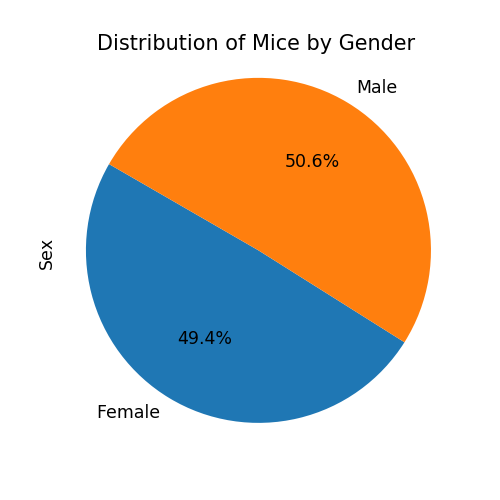

<function matplotlib.pyplot.show(*args, **kw)>

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_pie_plots=gender_count.plot(kind="pie", y="Sex", title= "Distribution of Mice by Gender",startangle=150,  figsize=(4,4), autopct='%1.1f%%')

plt.axis("equal")

plt.savefig("../Pymaceuticals/mice_pie_chart.png")
plt.show

<IPython.core.display.Javascript object>


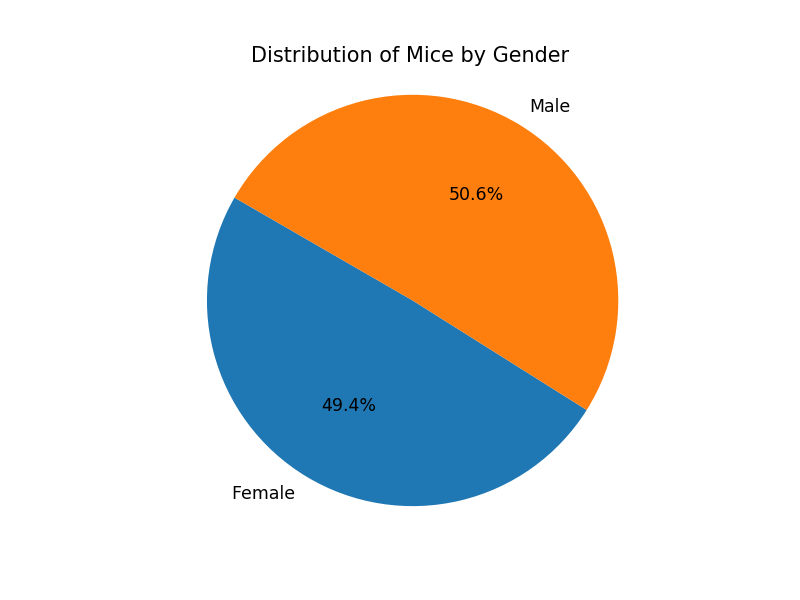

<function matplotlib.pyplot.show(*args, **kw)>

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_breakdown=merged_data_df.groupby("Sex")

#Count the mice per gender
gender_count=gender_breakdown["Sex"].count()

gender_index=list(gender_count.index.values)

plt.pie(gender_count, labels=gender_index, startangle=150, autopct='%1.1f%%', )

# Add the descriptive title, and set parameters
plt.title("Distribution of Mice by Gender")
plt.rcParams["font.size"]=5
plt.rcParams["figure.figsize"]=[4,4]
plt.axis("equal")
plt.savefig("../Pymaceuticals/mice_pie_chart.png")
plt.show

## Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

#Set variable list
regimen_list=['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']

#Identify Drug Regimen in regimen list
effective_regimens=merged_data_df[merged_data_df["Drug Regimen"].isin(regimen_list)]

eff_regimens_list=effective_regimens[["Mouse ID", "Drug Regimen","Timepoint", "Tumor Volume (mm3)"]]

#Identify the final tumor volume
tumorvol_by_regimen=eff_regimens_list.groupby(["Drug Regimen", "Mouse ID"]).last()["Tumor Volume (mm3)"]

#Unstack the data
regimen_unstacked=tumorvol_by_regimen.unstack(level=0)

regimen_unstacked

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,
a203,NaN,NaN,67.973419,NaN
a251,NaN,NaN,65.525743,NaN
a275,NaN,62.999356,NaN,NaN
a411,NaN,NaN,NaN,38.407618
a444,NaN,NaN,NaN,43.047543
...,...,...,...,...
y769,NaN,68.594745,NaN,NaN
y793,31.896238,NaN,NaN,NaN
y865,NaN,64.729837,NaN,NaN


In [30]:
counter = 0

# Calculate quartile for each drug regmin
for regimen in regimen_list:
    quartiles = regimen_unstacked[regimen].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
# Print calculations for each regimen
    if counter == 0:
        print(f"--------------------------------------------------------")
    print(f"{regimen} IQR and outliers calculation:")
    print(f"Lower quartile of {regimen}: {lowerq}")
    print(f"Upper quartile of {regimen}: {upperq}")
    print(f"Interquartile range: {iqr}")
    print(f"The the median Tumor Volume (mm3) is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} are outliers.")
    print(f"Values above {upper_bound} are outliers.")
    print(f"--------------------------------------------------------")
    counter += 1

--------------------------------------------------------
Capomulin IQR and outliers calculation:
Lower quartile of Capomulin: 32.38
Upper quartile of Capomulin: 40.16
Interquartile range: 7.78
The the median Tumor Volume (mm3) is: 38.13 
Values below 20.71 are outliers.
Values above 51.83 are outliers.
--------------------------------------------------------
Ceftamin IQR and outliers calculation:
Lower quartile of Ceftamin: 48.72
Upper quartile of Ceftamin: 64.3
Interquartile range: 15.58
The the median Tumor Volume (mm3) is: 59.85 
Values below 25.35 are outliers.
Values above 87.67 are outliers.
--------------------------------------------------------
Infubinol IQR and outliers calculation:
Lower quartile of Infubinol: 54.05
Upper quartile of Infubinol: 65.53
Interquartile range: 11.48
The the median Tumor Volume (mm3) is: 60.17 
Values below 36.83 are outliers.
Values above 82.75 are outliers.
--------------------------------------------------------
Ramicane IQR and outliers calcula

<IPython.core.display.Javascript object>


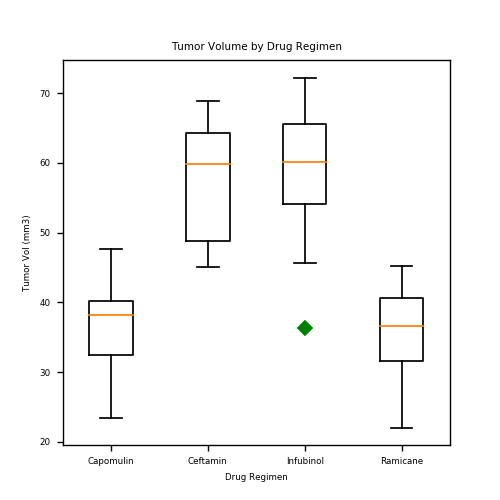

In [40]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

boxplot_list=[]

#Identify drug regimen in list
for regimen in regimen_list:
    boxplot_list.append(list(regimen_unstacked[regimen].dropna()))

#Create box plot
fig1, ax = plt.subplots(figsize=(4,4))

# Add the descriptive title, x labels and y labels
ax.set_title("Tumor Volume by Drug Regimen")
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Tumor Vol (mm3)")
ax.boxplot(boxplot_list,notch=0,sym='gD')
plt.xticks([1,2,3,4],regimen_list)

# Save and print the box plot
plt.savefig("../Pymaceuticals/boxplot.png")

plt.show()

## Line and Scatter Plots

<IPython.core.display.Javascript object>


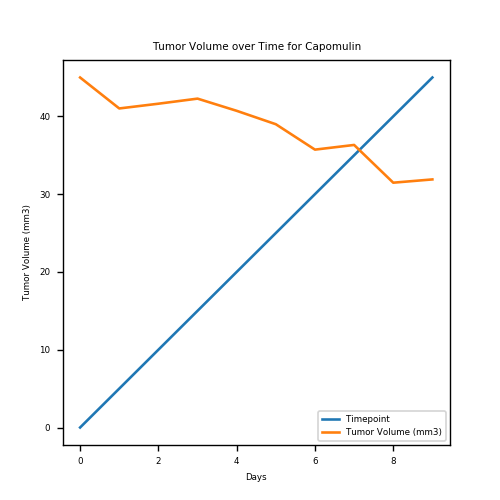

Text(0, 0.5, 'Tumor Volume (mm3)')

In [41]:

# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#Select data for mouse with ID 'y793'
mouse_capomulin = merged_data_df[merged_data_df["Mouse ID"].isin(["y793"])]

tumor_over_time = mouse_capomulin[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

#Reset Index
tumor_reset= tumor_over_time.reset_index()

tumor_plot = tumor_reset[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

#Plot the line
tumor_line_plot = tumor_plot.plot.line()

# Add the descriptive title, x labels and y labels
plt.title("Tumor Volume over Time for Capomulin")
plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm3)")

<IPython.core.display.Javascript object>


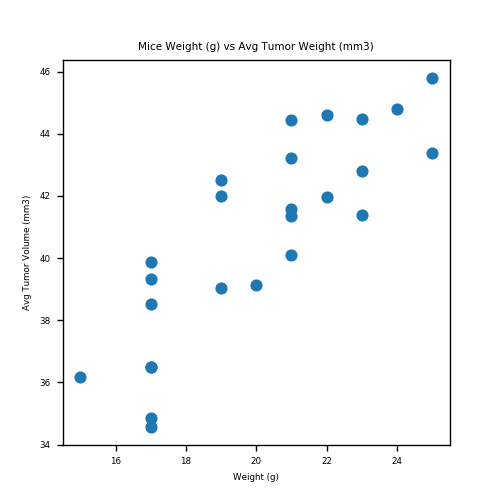

In [42]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#Identify drug regimen Capomulin
drug_capomulin = merged_data_df.loc[merged_data_df["Drug Regimen"] == "Capomulin"]

#Set data by Mouse ID, Weight and Tumor Volume
mice_avg= drug_capomulin. groupby(["Mouse ID"]).mean()

#Create scatter plot
plt.scatter(mice_avg["Weight (g)"], mice_avg["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.title("Mice Weight (g) vs Avg Tumor Weight (mm3)")

plt.savefig("scatterplot")

plt.show()

## Correlation and Regression

In [43]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(mice_avg["Weight (g)"],mice_avg["Tumor Volume (mm3)"])

print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


In [44]:
from scipy import stats

In [45]:
#Create x and y values 
x_values = mice_avg["Weight (g)"]
y_values = mice_avg["Tumor Volume (mm3)"]

#Create linear regression stats
tv_slope, tv_int, tv_r, tv_p, tv_std_err = stats.linregress(x_values, y_values)
line_eq = f'y = {str(round(tv_slope,2))}x + {str(round(tv_int,2))}'

In [46]:
# Set linear regression formula
tv_fit = tv_slope * x_values + tv_int

<IPython.core.display.Javascript object>


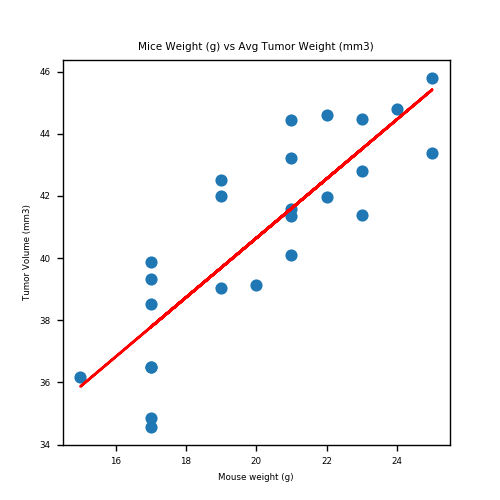

The equation of the regression line is: y = 0.95x + 21.55


In [47]:
#Create scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,tv_fit,"r-")

# Add the descriptive title, x labels and y labels
plt.title("Mice Weight (g) vs Avg Tumor Weight (mm3)")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")

#Print linear regression line
print(f"The equation of the regression line is: {line_eq}")
plt.show()
#Note: line printed in the scatter plot above